In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns

In [71]:
#data import
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era
# devided by WMO-defined gravity constant of 9.80665 m/s**2
ds_era_z500 = ds_era.fields[716,14,260:40:-1,720:1200]

ds_era_z500_1 = ds_era_z500[61:141,194:274]
np.shape(ds_era_z500)
ds_era_z500_mean = np.mean(ds_era_z500_1,axis=(0,1))

In [7]:
#ECMWF
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/'
filename_pattern = r'fc_pf_\d{8}_\d{2}_pl\.nc'

files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
files

['fc_pf_20210614_00_pl.nc',
 'fc_pf_20210615_00_pl.nc',
 'fc_pf_20210616_00_pl.nc',
 'fc_pf_20210617_00_pl.nc',
 'fc_pf_20210618_00_pl.nc',
 'fc_pf_20210619_00_pl.nc',
 'fc_pf_20210620_00_pl.nc',
 'fc_pf_20210621_00_pl.nc',
 'fc_pf_20210622_00_pl.nc',
 'fc_pf_20210623_00_pl.nc',
 'fc_pf_20210624_00_pl.nc',
 'fc_pf_20210625_00_pl.nc',
 'fc_pf_20210626_00_pl.nc',
 'fc_pf_20210627_00_pl.nc',
 'fc_pf_20210628_00_pl.nc',
 'fc_pf_20210629_00_pl.nc',
 'fc_pf_20210630_00_pl.nc',
 'fc_pf_20210701_00_pl.nc',
 'fc_pf_20210702_00_pl.nc',
 'fc_pf_20210703_00_pl.nc',
 'fc_pf_20210704_00_pl.nc']

In [ ]:
data_ec = []
for file in files:
    file_path = os.path.join(directory, file)
    # Extract the date from the filename
    #date_str = re.search(r'\d{8}_\d{2}', file).group(0)
    #date = datetime.datetime.strptime(date_str, '%Y%m%d_%H').date()
    # Read the file and extract the desired variable
    ds = xr.open_dataset(file_path)
    variable_data = ds['z'][:,2,:,:]

    #time_coord = xr.DataArray([date], dims='time1', coords={'time1': [date]})
    #variable_data = variable_data.expand_dims(dim='time1')
    #variable_data = variable_data.assign_coords(time=time_coord)

    data_ec.append(variable_data)

#combined_data = xr.concat(data, dim='time1')
#combined_data
#combined_data[0,:,119,234]
np.shape(data_ec)

#ds_ecmwf.t2m[0,79:159,194:274]
data_array_ec =xr.DataArray(data_ec)
#data_array_ec[:,0,0,0]
#mean_ecmwf = np.mean(data_array_ec[:,:,79:159,194:274], axis=(-2, -1))
#mean_ecmwf

In [2]:
ds_ec_1 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210615_00_pl.nc') 
ds_ec_1 

variable_data_ec_1 = ds_ec_1['z'][56,:,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))


ds_ec_2 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210616_00_pl.nc') 
variable_data_ec_2 = ds_ec_2['z'][52,:,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_3 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210617_00_pl.nc') 
variable_data_ec_3 = ds_ec_3['z'][48,:,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_4 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210618_00_pl.nc') 
variable_data_ec_4 = ds_ec_4['z'][44,:,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_5 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210619_00_pl.nc') 
variable_data_ec_5 = ds_ec_5['z'][40,:,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_6 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210620_00_pl.nc') 
variable_data_ec_6 = ds_ec_6['z'][36,:,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_7 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210621_00_pl.nc') 
variable_data_ec_7 = ds_ec_7['z'][32,:,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_8 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210622_00_pl.nc') 
variable_data_ec_8 = ds_ec_8['z'][28,:,2,79:159,194:274]

ds_ec_9 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210623_00_pl.nc') 
variable_data_ec_9 = ds_ec_9['z'][24,:,2,79:159,194:274]

ds_ec_10 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210624_00_pl.nc') 
variable_data_ec_10 = ds_ec_10['z'][20,:,2,79:159,194:274]

ds_ec_11 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210625_00_pl.nc') 
variable_data_ec_11 = ds_ec_11['z'][16,:,2,79:159,194:274]

ds_ec_12 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210626_00_pl.nc') 
variable_data_ec_12 = ds_ec_12['z'][12,:,2,79:159,194:274]

ds_ec_13 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210627_00_pl.nc') 
variable_data_ec_13 = ds_ec_13['z'][8,:,2,79:159,194:274]

ds_ec_14 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210628_00_pl.nc') 
variable_data_ec_14 = ds_ec_14['z'][4,:,2,79:159,194:274]

ds_ec_15 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210629_00_pl.nc') 
variable_data_ec_15 = ds_ec_15['z'][0,:,2,79:159,194:274]


In [3]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [13]})


In [4]:
ds_ec_z500 = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

In [20]:
ds_ec_z500_mean = np.mean(ds_ec_z500,axis = (2,3))

([<matplotlib.axis.XTick at 0x14b1fabfb4f0>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

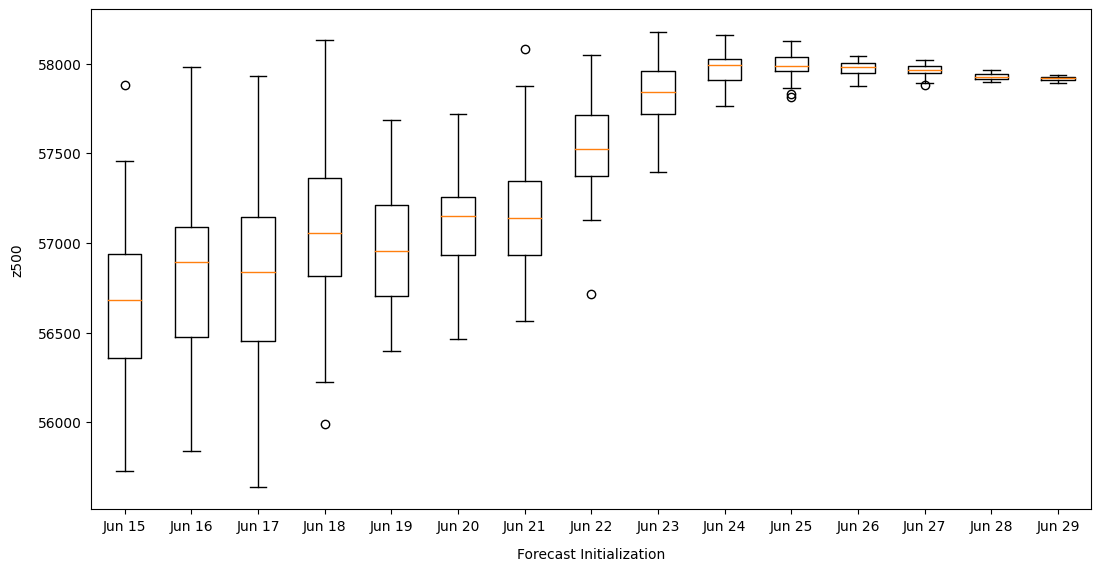

In [22]:


#boxplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("z500", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data=ds_ec_z500_mean.T
ax.boxplot(data)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

In [26]:
#fcn_era5
ds_fcn_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_era
fcn_era_z = ds_fcn_era.forecast[:,:,:,14,:,:]

In [27]:
fcn_era_z

<xarray.DataArray 'forecast' (phony_dim_0: 21, phony_dim_1: 51,
                              phony_dim_2: 57, phony_dim_4: 220,
                              phony_dim_5: 480)>
[6446563200 values with dtype=float64]
Coordinates:
    phony_dim_3  int64 14
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 20
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_5  (phony_dim_5) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479

In [33]:
variable_data_ec_1 = fcn_era_z[1,:,56,79:159,194:274]


variable_data_ec_2 = fcn_era_z[2,:,52,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))


variable_data_ec_3 = fcn_era_z[3,:,48,79:159,194:274]

variable_data_ec_4 = fcn_era_z[4,:,44,79:159,194:274]

variable_data_ec_5 = fcn_era_z[5,:,40,79:159,194:274]

variable_data_ec_6 = fcn_era_z[6,:,36,79:159,194:274]

variable_data_ec_7 = fcn_era_z[7,:,32,79:159,194:274]

variable_data_ec_8 = fcn_era_z[8,:,28,79:159,194:274]

variable_data_ec_9 = fcn_era_z[9,:,24,79:159,194:274]

variable_data_ec_10 = fcn_era_z[10,:,20,79:159,194:274]

variable_data_ec_11 = fcn_era_z[12,:,16,79:159,194:274]

variable_data_ec_12 = fcn_era_z[13,:,12,79:159,194:274]

variable_data_ec_13 = fcn_era_z[14,:,8,79:159,194:274]

variable_data_ec_14 = fcn_era_z[15,:,4,79:159,194:274]

variable_data_ec_15 = fcn_era_z[16,:,0,79:159,194:274]

In [35]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [13]})

In [37]:
ds_fc_era_z500 = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

In [39]:
ds_fc_era_z500_mean = np.mean(ds_fc_era_z500,axis = (2,3))

([<matplotlib.axis.XTick at 0x14b1f358be50>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

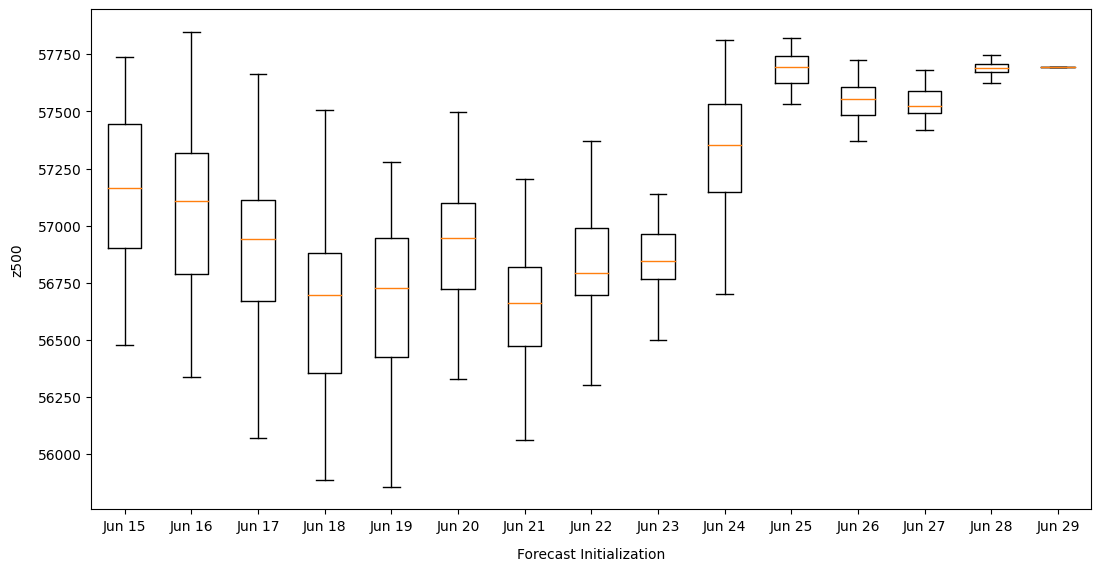

In [44]:
#boxplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("z500", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data=ds_fc_era_z500_mean[:,0:50].T
ax.boxplot(data,showfliers = False)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

In [45]:
#fcn_ecmwf
directory_fcn_ec = '/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/'
filename_pattern_fcn_ec = r'\d{8}_00_backtransformed\.nc'
#fc_cf_20210615_00_sfc.nc
#20210704_00_backtransformed.nc
files_fcn_ec = sorted([f for f in os.listdir(directory_fcn_ec) if re.match(filename_pattern_fcn_ec, f)])
files_fcn_ec

['20210614_00_backtransformed.nc',
 '20210615_00_backtransformed.nc',
 '20210616_00_backtransformed.nc',
 '20210617_00_backtransformed.nc',
 '20210618_00_backtransformed.nc',
 '20210619_00_backtransformed.nc',
 '20210620_00_backtransformed.nc',
 '20210621_00_backtransformed.nc',
 '20210622_00_backtransformed.nc',
 '20210623_00_backtransformed.nc',
 '20210624_00_backtransformed.nc',
 '20210625_00_backtransformed.nc',
 '20210626_00_backtransformed.nc',
 '20210627_00_backtransformed.nc',
 '20210628_00_backtransformed.nc',
 '20210629_00_backtransformed.nc',
 '20210630_00_backtransformed.nc',
 '20210701_00_backtransformed.nc',
 '20210702_00_backtransformed.nc',
 '20210703_00_backtransformed.nc',
 '20210704_00_backtransformed.nc']

In [51]:
ds_ec_1 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210615_00_backtransformed.nc') 
variable_data_ec_1 = ds_ec_1['forecast'][:,56,14,79:159,194:274]




ds_ec_2 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210616_00_backtransformed.nc') 
variable_data_ec_2 = ds_ec_2['forecast'][:,52,14,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_3 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210617_00_backtransformed.nc') 
variable_data_ec_3 = ds_ec_3['forecast'][:,48,14,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_4 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210618_00_backtransformed.nc') 
variable_data_ec_4 = ds_ec_4['forecast'][:,44,14,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_5 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210619_00_backtransformed.nc') 
variable_data_ec_5 = ds_ec_5['forecast'][:,40,14,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_6 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210620_00_backtransformed.nc') 
variable_data_ec_6 = ds_ec_6['forecast'][:,36,14,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_7 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210621_00_backtransformed.nc') 
variable_data_ec_7 = ds_ec_7['forecast'][:,32,14,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_8 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210622_00_backtransformed.nc') 
variable_data_ec_8 = ds_ec_8['forecast'][:,28,14,79:159,194:274]

ds_ec_9 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210623_00_backtransformed.nc') 
variable_data_ec_9 = ds_ec_9['forecast'][:,24,14,79:159,194:274]

ds_ec_10 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210624_00_backtransformed.nc') 
variable_data_ec_10 = ds_ec_10['forecast'][:,20,14,79:159,194:274]

ds_ec_11 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210625_00_backtransformed.nc') 
variable_data_ec_11 = ds_ec_11['forecast'][:,16,14,79:159,194:274]

ds_ec_12 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210626_00_backtransformed.nc') 
variable_data_ec_12 = ds_ec_12['forecast'][:,12,14,79:159,194:274]

ds_ec_13 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210627_00_backtransformed.nc') 
variable_data_ec_13 = ds_ec_13['forecast'][:,8,14,79:159,194:274]

ds_ec_14 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210628_00_backtransformed.nc') 
variable_data_ec_14 = ds_ec_14['forecast'][:,4,14,79:159,194:274]
ds_ec_15 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210629_00_backtransformed.nc') 
variable_data_ec_15 = ds_ec_15['forecast'][:,0,14,79:159,194:274]

In [55]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [13]})

In [56]:
ds_fc_ec_z500 = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

In [57]:
ds_fc_ec_z500_mean = np.mean(ds_fc_ec_z500,axis = (2,3))

([<matplotlib.axis.XTick at 0x14b1f6ba0850>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

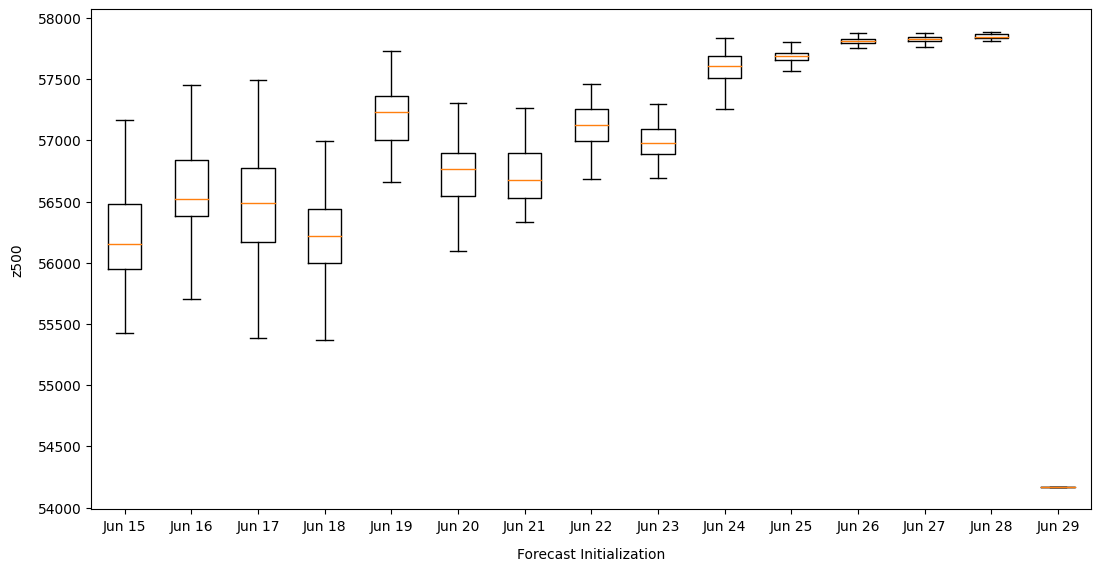

In [58]:
#boxplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("z500", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data=ds_fc_ec_z500_mean[:,1:51].T
ax.boxplot(data,showfliers = False)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

In [59]:
%store ds_fc_ec_z500_mean
%store ds_fc_era_z500_mean
%store ds_ec_z500_mean

Stored 'ds_fc_ec_z500_mean' (DataArray)
Stored 'ds_fc_era_z500_mean' (DataArray)
Stored 'ds_ec_z500_mean' (DataArray)


In [75]:
import matplotlib.pyplot as pl
#%store -r data_array_fc_ec_values_850hpa
colors = [ 'lightblue','lightgreen','lightpink']


# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [(ds_ec_z500_mean.values/9.806659).T,(ds_fc_era_z500_mean.values/9.80665).T,(ds_fc_ec_z500_mean.values/9.80665).T]
#np.shape(data_groups)

-1.0
0.0
1.0


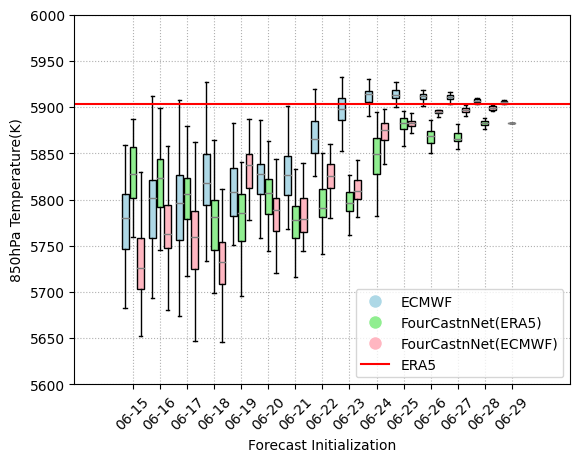

In [79]:
# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(ds_ec_z500_mean[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(5600,6000)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('850hPa Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False
                )
%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )


legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]+ line_artists 
plt.legend(handles=legend_handles, loc='lower right')
#plt.savefig('/home/kit/imk-tro/gj5173/21.09_boxplot/850_ts_ensemble_3togther.png', bbox_inches='tight',dpi=100)

pl.show()